In [1]:
# Tehdään perus EDA (Explorative Data Analysis)
!pip install ydata-profiling
!pip install setuptools


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
"""
# Tarkastellaan ja poistetaan Outlierit
# Täydellä datalla, kestää noin 6.5min
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10, 6))
df.boxplot(column=['x', 'y'])
plt.title('Boxplot of X and Y Variables')
plt.ylabel('Values')
plt.xlabel('Variables')
plt.show()

print(df.describe())

"""

In [2]:
import duckdb
import pandas as pd
duckdb_path = "data/duckdb.database" # Duckdb tietokannalle annettava nimi, tallentuu lokaalisti
table_name = "Silver_SensorData" # Tietokantataulu, josta luetaan (voi olla myös Silver_SensorData_lite)

# Ota yhteys tietokantaa ja tarkista mitä dataa taulusta löytyy
conn = duckdb.connect(database=duckdb_path)
conn.table(table_name).show()
conn.close()

┌─────────┬──────────────────────┬───────┬───────┬───┬──────────┬───────────┬───────────┬───────────┬───────────┐
│ node_id │      timestamp       │   x   │   y   │ … │ distance │ timedelta │   speed   │ x_scaled  │ y_scaled  │
│  int32  │      timestamp       │ int32 │ int32 │   │  float   │   int32   │   float   │   float   │   float   │
├─────────┼──────────────────────┼───────┼───────┼───┼──────────┼───────────┼───────────┼───────────┼───────────┤
│    3200 │ 2019-03-13 17:29:4…  │   -50 │    50 │ … │      0.0 │         1 │       0.0 │ 119.59447 │ 31.431034 │
│    3200 │ 2019-03-13 17:29:4…  │   -50 │    50 │ … │      0.0 │         1 │       0.0 │ 119.59447 │ 31.431034 │
│    3200 │ 2019-03-13 17:29:5…  │   -50 │    50 │ … │      0.0 │         1 │       0.0 │ 119.59447 │ 31.431034 │
│    3200 │ 2019-03-13 17:29:5…  │   -50 │    50 │ … │      0.0 │         1 │       0.0 │ 119.59447 │ 31.431034 │
│    3200 │ 2019-03-13 17:29:5…  │   -50 │    50 │ … │      0.0 │         2 │       0.0 

In [3]:
import duckdb
import pandas as pd
import polars as pl

# Ota yhteys tietokantaa ja tarkista mitä dataa taulusta löytyy
conn = duckdb.connect(database=duckdb_path)
df = conn.sql(f"SELECT * FROM {table_name}").pl() # Tallenentaan taulun data Polars dataframeen
conn.close()

In [4]:
df = df.to_pandas()

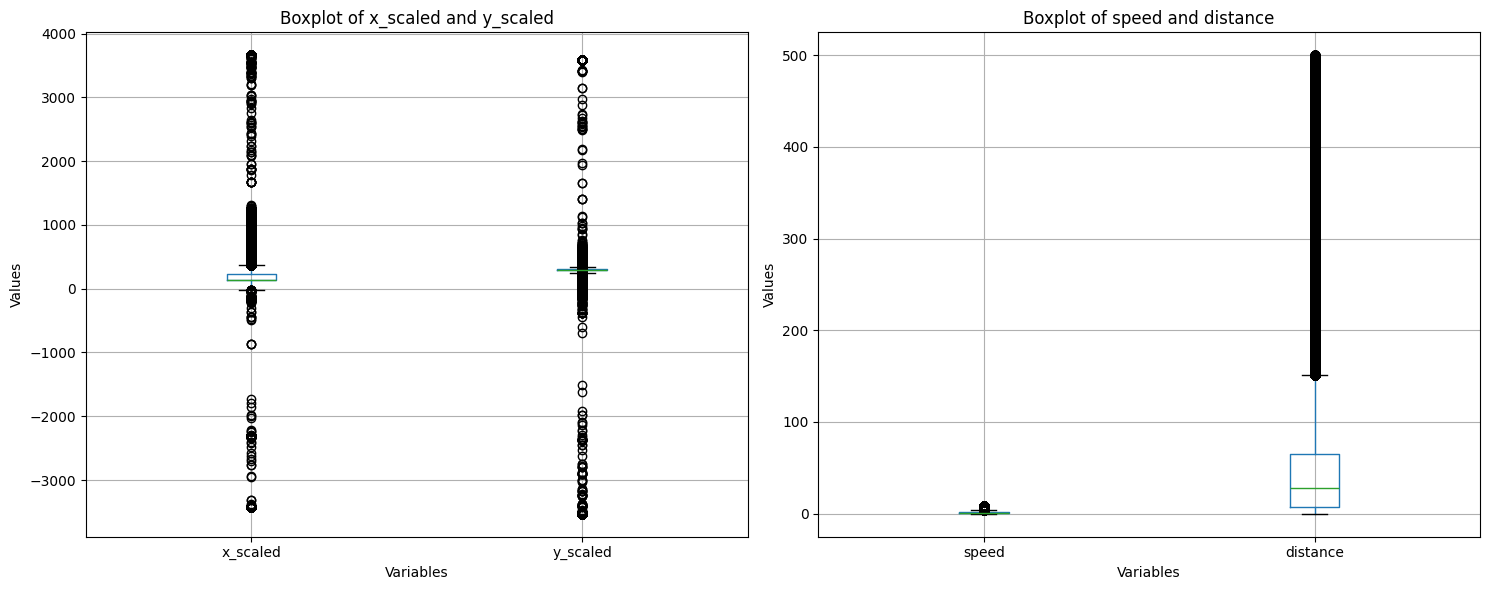

            node_id                   timestamp             x             y  \
count  3.822525e+07                    38225250  3.822525e+07  3.822525e+07   
mean   4.573122e+04  2019-08-26 15:58:54.424244  1.092796e+03  2.534173e+03   
min    3.200000e+03  2019-03-06 17:26:33.000080 -3.281800e+04 -3.271800e+04   
25%    5.175100e+04  2019-06-08 20:24:56.250992  4.500000e+01  2.427000e+03   
50%    5.197600e+04  2019-09-03 22:53:40.500612  1.520000e+02  2.510000e+03   
75%    5.253500e+04  2019-11-11 18:13:10.750473  9.500000e+02  2.643000e+03   
max    5.401600e+04  2020-01-23 15:07:25.000479  3.271700e+04  3.281700e+04   
std    1.691089e+04                         NaN  2.597779e+03  1.228454e+03   

         previous_x    previous_y      distance     timedelta         speed  \
count  3.822525e+07  3.822525e+07  3.822525e+07  3.822525e+07  3.822525e+07   
mean   1.092882e+03  2.534099e+03  4.696370e+01  1.713572e+01  1.116619e+00   
min   -3.281800e+04 -3.271800e+04  0.000000e+00  1.

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

# Create a figure and two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Boxplot for x_scaled and y_scaled
df[['x_scaled', 'y_scaled']].boxplot(ax=axes[0])
axes[0].set_title('Boxplot of x_scaled and y_scaled')
axes[0].set_ylabel('Values')
axes[0].set_xlabel('Variables')

# Boxplot for speed and distance
df[['speed', 'distance']].boxplot(ax=axes[1])
axes[1].set_title('Boxplot of speed and distance')
axes[1].set_ylabel('Values')
axes[1].set_xlabel('Variables')

plt.tight_layout()
plt.show()

print(df.describe())
